<span style="color:####; font-family: sabon; font-size: 3em;">
    <center> Kernel Support Vector Machine </center> <br>
</span>

<span style="color:####; font-family: sabon; font-size: 2.5em;">
   <center> Aprendizaje Máquina </center> <br>
    <center> Kevin Emmanuel Soto Hernandez </center> <br>
</span>

In [737]:
#HERRAMIENTAS AUXILIARES
import numpy as np

#GRAFICACION
import matplotlib.pyplot as plt

#SUPPORT VECTOR MACHINES
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import confusion_matrix 

In [738]:
#Segundo conjunto de datos (real)
iris = datasets.load_iris()
iris_features = iris.data
iris_labels = iris.target

### Introduccion
Dado un conjunto de datos $D = \{x_i, y_i \}_{i=1}^n$ con $x_i \in\mathbb{R}^{d}$ y $y_i \in \{ 1,-1\}$, existe un hierplano $h(x) = w^Tx+1$ de separacion que clasifica cada punto. En otras palabras, todos los puntos etiqutados con $y_i =1$ permancen en el lado $h(x)>0$ y los datos clasificados con la etiqueta $y_i =-1 $ permancen en el lado $h(x)<0$.

La idea fundamental detras de SVM es la eleccion del hiperplano canonico especificado por el vector de peso $w$ y el sesgo $b$
que produce el maximo margen posible entre todos los posibles hiperplanos de separacion. Si $\delta_h^*$ representa el margen para el hiperplano $h(x) = w^Tx+b = 0$, entonces el objetivo es encontrar el hiperplano optimo $h^*$:

$$ h^* = arg\max_h \{ \delta_h^* \} = arg\max_{w,b} \left\{ \frac{1}{\lVert w \rVert} \right\}$$

sujeto a las $n$ restricciones dadas por $y_i(w^Tx_i +b ) \geq 1 $ para todos los puntos $x_i \in D$

Observe que, en lugar de optimizar la función de arriba, se puede cambiar el problema por otro equivalente dado como

$$ \min_{w,b }\left\{ \frac{1}{2} \lVert w \rVert^2 \right\}$$

Hasta ahora hemos asumido que los datos son perfectamente separables. Sin embargo, para nuestro caso, no lo serán. SVM puede manejar puntos que no son linealmente separables simplemente introduciendo variables de olgura $\xi_i$ en las restricciones del problema:

$$ y_i(w^Tx_i +b ) \geq 1-\xi_i  $$

donde $\xi_i\geq 0$ indicando cuanto el punto $x_i $ viola la restriccion original.

Entonces la nueva función objetivo es:

$$ \min_{w,b }\left\{ \frac{1}{2} \lVert w \rVert^2 + C\sum \limits_{i=1}^n \xi_i \right\}$$

El escalar $C$, el cual es elegido de forma empírica, es la _constante de regularización_ que controla la relacion entre maximizar el margen y controlar la penalización introducida. 
Tornamos esto al problema dual Langrangiano dado que es mucho mas sencillo aplicar el gradiente de descenso estocástico. Omitiendo los pasos, el problema general a resolver es:

$$ \max_{\alpha } L_{dual} = \sum \limits_{i=1}^n \alpha_i - \frac{1}{2} \sum \limits_{i=1}^n \sum \limits_{j=1}^n \alpha_i \alpha_j y_i y_j x_i^Tx_j$$
$$subject \: to: 0 \leq \alpha_i \leq C \; \; and \; \sum \limits_{i=1}^n \alpha_i y_i=0 \; \forall i$$

donde $\alpha = [\alpha_1, \alpha_2, \dots, \alpha_n]$ es el vector de multiplicadores de Lagrange.
Una vez que hemos resuelto para $\alpha$, podemos obtener el vector de pesos $w$ del SVM original a través de la formula:

$$ w = \sum \limits_{\alpha_i >0} \alpha_i y_i x_i $$

y el termino de sesgo como el promedio de la formula

$$ b = mean ( y_i -w^Tx_i ) $$

ambas formulas solo son validas para los indices $i$ tal que $\alpha_i > 0 $, es decir, el indice $i$ indica que el vector $x_i$ es un vector de soporte.

### La Tarea
En esta tarea, vamos a implementar una variante del método kernel. Supondremos que la distribución de ambos conjuntos de datos se puede explicar mediante una mezcla de distribuciones gaussianas, centradas de cada uno de los datos $x_i$ a través del mapeo $\phi(x_i)$:

$$ K(x, y) = \phi(x)^T \phi(y) = \exp \left\{ - \frac{\lVert x-y \rVert^2}{2\sigma^2}  \right\}$$

Al método anterior le llamaremos la máquina de kernels de soporte (KSM).


**Ejercicio 1.** Implemente un algoritmo en Python para resolver el problema de optimización dual asociado a la KSM. Tiene dos opciones para resolverlo:

* implementación propia de un método para resolver problemas de optimización con restricciones de desigualdad (e.g. penalización, Lagrangiano aumentado, etc.)

* puede usar librer´ıas de Python que ya resuelvan este tipo de problemas. En ese caso, usted sólo debe adaptar el problema (1) a la forma estándar que su librería requiera.

Asuma como datos las observaciones $(x_i, y_i)$, la varianza $\sigma^2$. Su algoritmo debe devolver el vector de coeficientes óptimos $w^*$.

Sea la base de datos original dada como $D=\{x_i, y_i\}_{i=1}^n$ Aplicando $\phi$ a cada punto podemos obtener la nueva base de datos en el espacio característico $D_{\phi}=\{\phi(x_i), y_i\}_{i=1}^n$. Para el problema dual en el espacio caracteristico la función de optmización es:

$$ \max_{\alpha } L_{dual} = \sum \limits_{i=1}^n \alpha_i - \frac{1}{2} \sum \limits_{i=1}^n \sum \limits_{j=1}^n \alpha_i \alpha_j y_i y_j \phi(x_i)^T\phi(x_j)$$
$$subject \: to: 0 \leq \alpha_i \leq C \; \; and \; \sum \limits_{i=1}^n \alpha_i y_i=0 \; \forall i$$

$$= \max_{\alpha } L_{dual} = \sum \limits_{i=1}^n \alpha_i - \frac{1}{2} \sum \limits_{i=1}^n \sum \limits_{j=1}^n \alpha_i \alpha_j y_i y_j K(x_i,x_j)$$
$$subject \: to: 0 \leq \alpha_i \leq C \; \; and \; \sum \limits_{i=1}^n \alpha_i y_i=0 \; \forall i$$

Consideramos un algoritmo simple de optimización con descenso de gradiente estocástico para resolver el problema dual. Es importante notar que este método no es el mas eficiente pero si uno de los mas fáciles de implementar.

Considere el término $J(\alpha_k)$ como la función que solo considera el multiplicador de Lagrange $\alpha_k$ en el Lagrangiano:

$$J(\alpha_k) = \alpha_k - \frac{1}{2} \alpha_k^2y_k^2K(x_k,x_k) - \alpha_ky_k \sum_{i\neq k}^n \alpha_ky_k K(x_i, x_k)$$

Entonces el $k$-ésimo elemento del gradiente del Lagrangiano $\nabla L_{dual}$ viene dado por la derivada de $J(\alpha_k)$:

$$ \frac{\partial J(\alpha_k)}{\partial \alpha_k} = 1 - y_k \sum_{i= 1}^n \alpha_ky_k K(x_i, x_k)$$

Debido a que queremos maximizar la función, debemos mover la $k$-ésima componente de $\alpha$ en la dirección de $\frac{\partial J(\alpha_k)}{\partial \alpha_k}$:

$$ \alpha_k = \alpha_k + \eta_k \frac{\partial J(\alpha_k)}{\partial \alpha_k} = \alpha_k + \eta_k \left( 1 - y_k \sum_{i= 1}^n \alpha_ky_k K(x_i, x_k)  \right)$$

Tambien tenemos que asegurarnos que la restricción $\alpha_k \in [0,C]$ se cumpla aplicando la preyección del elemento en el intervalo a través de la versión de ascenso de gradiente descafeinado. 

El algoritmo del ascenso de gradiente estocástico está dado a continuación:

In [517]:
def stochastic_gradient_ascent(x, y, Kernel, C=10, tol_a=1e-4, max_iter=100):
    n = x.shape[0]
            
    eta = 1.0/np.diag(Kernel)
    #Kernel = y*Kernel
    
    alpha = np.zeros(n)
    _alpha_ = np.zeros(n)
    one = np.ones(n)
    
    itera = 0
    while(True):
        
        #Gradiente Estocástico 
        #_alpha_ = alpha + eta*(one -y*np.sum(alpha*Kernel, axis=1) )
        for k in range(n):
            _alpha_[k] = alpha[k]+eta[k]*(1- y[k]*np.sum(alpha*y*Kernel[:,k]))
        
        #Proyección Descafeinada al conjunto factible 
        _alpha_[_alpha_<0] = 0
        _alpha_[_alpha_>C] = C
        
        #print(np.linalg.norm(_alpha_ - alpha) )
        if itera >= max_iter or np.linalg.norm(_alpha_ - alpha) < tol_a:
            break

        alpha = _alpha_
        itera+=1
    
    return _alpha_
        

De aquí es fácil implementar el la función de Kernel Support Machine primero definiendo la función del kernel para dos puntos $K(x,y)$

In [8]:
def K(x, y, var = 1):
    return np.exp(-(np.linalg.norm(x-y))**2/(2*var))

El valor de ``var`` es la varianza de la densidad gausiana que más tarde usaremos como variable de "overfitting". La función ``Kernel_Support_Machine`` recibe como parámetros la base de datos ``x`` y el vector de etiquetas ``y``. A la base de datos le agrega una columan de unos indicando la presencia de factor de sergo $b$. Despues construye la matriz Kernel y la pasa como parámetro a la función del ascenso de gradiente estocástico. Con el vector de pesos ``alpha`` se pueden obtener los valores de las clasificaciones del modelo para un nuevo punto $z$ con la fórmula:

$$ \hat{y} = sign\left(\sum_{\alpha_i>0} \alpha_i y_i K(x_i, z) \right)$$

Es decir, $\hat{y} \in \{-1, 1\}$.

In [626]:
def Kernel_Support_Machine(x, y, var=1):
    n = x.shape[0]
    x = np.append(np.ones(n).reshape(n,1), x, axis=1)
    
    Kernel_Matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            Kernel_Matrix[i,j] = K(x[i,:], x[j,:], var)

    alpha = stochastic_gradient_ascent(x, y, Kernel_Matrix)
    
    y_svm = np.sum(alpha[alpha>0]*y[alpha>0]*Kernel_Matrix[:,alpha>0], axis=1)
    y_svm[y_svm>0] = 1
    y_svm[y_svm<0] = -1
        
    return y_svm, alpha

La función ``predict`` sintetiza todo esto:

In [685]:
def predict(x, alpha, Data, labels, var=1):
    x_a = Data[alpha>0,:]
    y_a = labels[alpha>0]
    alpha_a = alpha[alpha>0]
    w = np.zeros(x_a.shape[0])
    for k in range(x_a.shape[0]):
        w[k] = alpha_a[k]*y_a[k]*K(x_a[k], x, var)
    return np.sum(w)

**Ejercicio 2.** Aplique su algoritmo para clasificar dos conjuntos de datos: uno sintético y uno real.
Para el caso sintético, elija 200 observaciones $(x_i, y_i)$ (100 de cada clase), con $x_i \in \mathbb{R}^2$, que tengan alguna distribución interesante. Por ejemplo puede utilizar dos distribuciones circulares concéntricas,
o distribuciones aún más extrañas.

Para el caso real, tome por ejemplo el un subconjunto de datos IRIS (tome dos de las clases, y dos
de las variables, para trabajar en $\mathbb{R}^2$). O si lo prefiere, tome otro conjunto de datos que considere
interesante.

* En ambos casos, compare el resultado de su método KSM contra el método de kernel SVM que viene implementado en ``scikit-learn``
* Estudie cómo varía el número de gaussianas presentes en el modelo de clasificación, y cómo cambian las regiones de clasificación, cuando se varía el parámetro $\sigma^2$.


Para el caso de la base de datos sintética, crearemos una distribuccion de puntos concentricos como se muestra a continuación:

In [627]:
#Primer circulo central
circle_1x = np.random.normal(loc=0, scale=1, size=100)
circle_1y = np.random.normal(loc=0, scale=1, size=100)
circles_1 = np.c_[circle_1x,circle_1y]

#Segundo circulo periferico.
r = (6-4)*np.random.rand(100)+4
theta = np.random.rand(100)
circle_2x = r*np.cos(2*np.pi*theta)
circle_2y = r*np.sin(2*np.pi*theta)
circles_2 = np.c_[circle_2x,circle_2y]

#unimos los puntos en una unica base de datos
circles_features = np.r_[circles_1, circles_2]

Además, creamos sus etiquetas con $y_i \in \{-1,1 \}$ 

In [628]:
circles_labels = np.ones(200, dtype=np.int8)
circles_labels[:100] = -1

La distribución de puntos luce así:

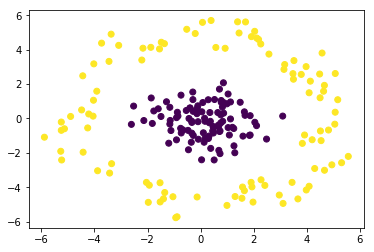

In [629]:
plt.scatter(circles_features[:,0], circles_features[:,1], c=circles_labels)
plt.show()

Al aplicar la función ``Kernel_Support_Machine`` podemos obtener la etiquetas predichas y el vector de pesos dual $\alpha$ (``alpha``) 

In [694]:
y_svm, alpha_circles = Kernel_Support_Machine(circles_features, circles_labels, var=1)

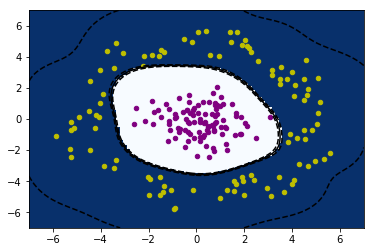

In [695]:
x = np.linspace(-7, 7, 100)
y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(x, y)

XY = np.array([X,Y])
Z = np.zeros_like(X)

n,m = X.shape
for i in range(n):
    for j in range(m):
        Z[i,j] = predict(XY[:,i,j], alpha_circles, circle_feature, circles_labels,1)

plt.figure()
plt.pcolormesh(X, Y, Z > 0, cmap=plt.cm.Blues )
plt.contour(X, Y, Z, colors =['k','k','k'], levels=[-0.5, 0, 0.5], linestyles=['--','-','--'] )
plt.scatter(circles_1[:,0],circles_1[:,1], color='purple',s=20)
plt.scatter(circles_2[:,0],circles_2[:,1], color='y', s=20)

La precisión de las etiquetas es:

In [693]:
count = 0
for i in range(200):
    if circles_labels[i]==y_svm[i]: count+=1
print("Precisión en la predicción correcta:",count/200)

M_confu = confusion_matrix(y_svm, circles_labels)
print("Matriz de confución usando: KSM")
print(M_confu,"\nTotal de errores:", 200-np.trace(M_confu),"\n")

Precisión en la predicción correcta: 1.0
Matriz de confución usando: KSM
[[100   0]
 [  0 100]] 
Total de errores: 0 



Podemos comparar este resultado con el obtenido por la función ``svm.SVM`` e imprimir en gráfica las regiones de decisión 

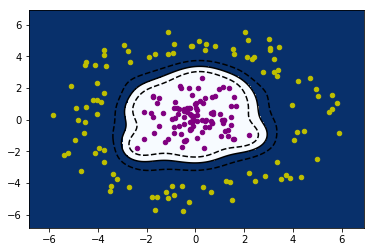

In [606]:
clf = svm.SVC(kernel='rbf', gamma=1)
clf.fit(circles_features, circles_labels)

prediction = clf.predict(circle_feature)

X, Y = np.mgrid[circles_features[:,0].min()-1:circles_features[:,0].max()+1:200j, circles_features[:,0].min()-1:circles_features[:,0].max()+1:200j]

Z = clf.decision_function(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

plt.figure()
plt.pcolormesh(X, Y, Z > 0, cmap=plt.cm.Blues )
plt.contour(X, Y, Z, colors =['k','k','k'], levels=[-0.5, 0, 0.5], linestyles=['--','-','--'] )
plt.scatter(circles_1[:,0],circles_1[:,1], color='purple',s=20)
plt.scatter(circles_2[:,0],circles_2[:,1], color='y', s=20)

In [554]:
count = 0
for i in range(200):
    if circles_labels[i]==prediction[i]: count+=1
print("Precisión en la predicción correcta:",count/200)

M_confu = confusion_matrix(prediction, circles_labels)
print("Matriz de confución usando: svm.SVM")
print(M_confu,"\nTotal de errores:", 200-np.trace(M_confu),"\n")

Precisión en la predicción correcta: 1.0
Matriz de confución usando: svm.SVM
[[100   0]
 [  0 100]] 
Total de errores: 0 



En la base de datos IRIS elegimos la información de los puntos que solo contienen a las clases 1 y 2 dado que son los puntos mas pegados. Además, seleccionamos la segunda y tercera columna del espacio caracteristico de los datos, es decir, proyectamos los datos de $\mathbb{R}^4$ a $\mathbb{R}^2$ 

In [674]:
#Plantas con etiqueta 1
iris_1 = iris_features[iris_labels==1]
iris_1 = iris_1[:,1:3]

#Plantas con etiqueta 2
iris_2 = iris_features[iris_labels==2]
iris_2 = iris_2[:,1:3]

#unimos los puntos en una unica base de datos
iris_features = np.r_[iris_1, iris_2]

Además, creamos sus etiquetas con $y_i \in \{-1,1 \}$ 

In [675]:
iris_labels = np.ones(iris_1.shape[0]+iris_2.shape[0])
iris_labels[:iris_1.shape[0]] = -1

La distribución de puntos luce así:

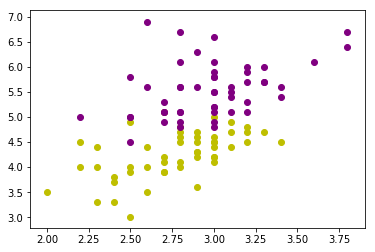

In [676]:
plt.scatter(iris_1[:,0], iris_1[:,1], c='y')
plt.scatter(iris_2[:,0], iris_2[:,1], c='purple')
plt.show()

Al aplicar la función ``Kernel_Support_Machine`` podemos obtener la etiquetas predichas y el vector de pesos dual $\alpha$ (``alpha``) 

In [701]:
y_svm, alpha_iris = Kernel_Support_Machine(iris_features, iris_labels, 0.1)

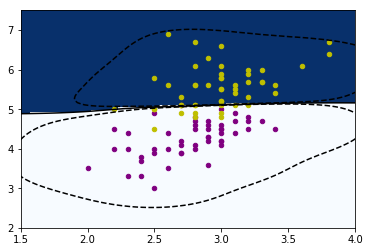

In [702]:
x = np.linspace(1.5, 4, 100)
y = np.linspace(2.0, 7.5, 100)
X, Y = np.meshgrid(x, y)

XY = np.array([X,Y])
Z = np.zeros_like(X)

n,m = X.shape
for i in range(n):
    for j in range(m):
        Z[i,j] = predict(XY[:,i,j], alpha_iris, iris_features, iris_labels, var=0.1)

plt.figure()
plt.pcolormesh(X, Y, Z > 0, cmap=plt.cm.Blues )
plt.contour(X, Y, Z, colors =['k','k','k'], levels=[-0.5, 0, 0.5], linestyles=['--','-','--'] )
plt.scatter(iris_1[:,0],iris_1[:,1], color='purple',s=20)
plt.scatter(iris_2[:,0],iris_2[:,1], color='y', s=20)

In [703]:
count = 0
for i in range(100):
    if iris_labels[i]==y_svm[i]: count+=1
print(count/100)

M_confu = confusion_matrix(y_svm, iris_labels)
print("Matriz de confución usando: KSM")
print(M_confu,"\nTotal de errores:", 100-np.trace(M_confu),"\n")

0.88
Matriz de confución usando: KSM
[[49 11]
 [ 1 39]] 
Total de errores: 12 



Podemos comparar este resultado con el obtenido por la función ``svm.SVM`` e imprimir en gráfica las regiones de decisión 

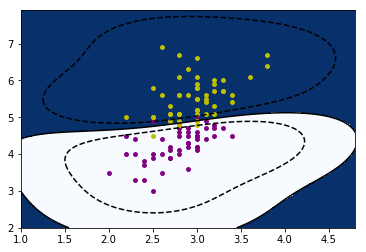

In [704]:
clf = svm.SVC(kernel='rbf', gamma=1)
clf.fit(iris_features, iris_labels)

prediction = clf.predict(iris_features)

X, Y = np.mgrid[iris_features[:,0].min()-1:iris_features[:,0].max()+1:200j, iris_features[:,1].min()-1:iris_features[:,1].max()+1:200j]

Z = clf.decision_function(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

plt.figure()
plt.pcolormesh(X, Y, Z > 0, cmap=plt.cm.Blues )
plt.contour(X, Y, Z, colors =['k','k','k'], levels=[-0.5, 0, 0.5], linestyles=['--','-','--'] )
plt.scatter(iris_1[:,0],iris_1[:,1], color='purple',s=15)
plt.scatter(iris_2[:,0],iris_2[:,1], color='y', s=15)

In [705]:
count = 0
for i in range(100):
    if iris_labels[i]==prediction[i]: count+=1
print(count/100)

M_confu = confusion_matrix(prediction, iris_labels)
print("Matriz de confución usando: svm.SVM")
print(M_confu,"\nTotal de errores:", 100-np.trace(M_confu),"\n")

0.93
Matriz de confución usando: svm.SVM
[[47  4]
 [ 3 46]] 
Total de errores: 7 



Para estudiar como varia el numero de densidades gausianas activadas en el método ``KSM`` se tomamó el caso prueba de base de datos sintética:

Observamos en un serie de experimentaciones que a medida que la varianza $\sigma^2$ disminuía en la función de mapeo gaussiana $K(x,y)$ la precision del clasificador aumentaba considerablemente, pero tambien crecia el número de gaussianas activas. El efecto colateral fue que las regiones de decisión se ajustaban más y más a los datos de forma que, por ejemplo, los datos $x_i \in D$ que pertenecian a la clase $y_j$ estaban rodeados unicamente por su densidad gaussiana.

Para demostrar este efecto se tomamó $\sigma^2 \in \{5, 1, 0.5, 0.1, 0.01 \}$. Observe el efecto:

In [729]:
# sigma^2 = 5
var = 5
y_svm, alpha_circles = Kernel_Support_Machine(circles_features, circles_labels, var)

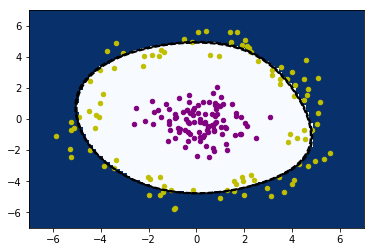

In [708]:
x = np.linspace(-7, 7, 100)
y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(x, y)

XY = np.array([X,Y])
Z = np.zeros_like(X)

n,m = X.shape
for i in range(n):
    for j in range(m):
        Z[i,j] = predict(XY[:,i,j], alpha_circles, circle_feature, circles_labels, var)

plt.figure()
plt.pcolormesh(X, Y, Z > 0, cmap=plt.cm.Blues )
plt.contour(X, Y, Z, colors =['k','k','k'], levels=[-0.5, 0, 0.5], linestyles=['--','-','--'] )
plt.scatter(circles_1[:,0],circles_1[:,1], color='purple',s=20)
plt.scatter(circles_2[:,0],circles_2[:,1], color='y', s=20)

In [730]:
count = 0
for i in range(200):
    if circles_labels[i]==y_svm[i]: count+=1
print("Precisión en la predicción correcta:",count/200)

M_confu = confusion_matrix(y_svm, circles_labels)
print("Matriz de confución usando: KSM sigma=5")
print(M_confu,"\nTotal de errores:", 200-np.trace(M_confu),"\n")
print("% de Gaussianas activas:", alpha_circles[alpha_circles>0].shape[0]/alpha_circles.shape[0])

Precisión en la predicción correcta: 0.755
Matriz de confución usando: KSM sigma=5
[[100  49]
 [  0  51]] 
Total de errores: 49 

% de Gaussianas activas: 0.73


In [731]:
# sigma^2 = 1
var = 1
y_svm, alpha_circles = Kernel_Support_Machine(circles_features, circles_labels, var)

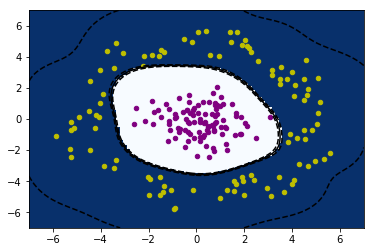

In [711]:
x = np.linspace(-7, 7, 100)
y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(x, y)

XY = np.array([X,Y])
Z = np.zeros_like(X)

n,m = X.shape
for i in range(n):
    for j in range(m):
        Z[i,j] = predict(XY[:,i,j], alpha_circles, circle_feature, circles_labels,var)

plt.figure()
plt.pcolormesh(X, Y, Z > 0, cmap=plt.cm.Blues )
plt.contour(X, Y, Z, colors =['k','k','k'], levels=[-0.5, 0, 0.5], linestyles=['--','-','--'] )
plt.scatter(circles_1[:,0],circles_1[:,1], color='purple',s=20)
plt.scatter(circles_2[:,0],circles_2[:,1], color='y', s=20)

In [732]:
count = 0
for i in range(200):
    if circles_labels[i]==y_svm[i]: count+=1
print("Precisión en la predicción correcta:",count/200)

M_confu = confusion_matrix(y_svm, circles_labels)
print("Matriz de confución usando: KSM sigma=1")
print(M_confu,"\nTotal de errores:", 200-np.trace(M_confu),"\n")
print("% de Gaussianas activas:", alpha_circles[alpha_circles>0].shape[0]/alpha_circles.shape[0])

Precisión en la predicción correcta: 1.0
Matriz de confución usando: KSM sigma=1
[[100   0]
 [  0 100]] 
Total de errores: 0 

% de Gaussianas activas: 0.715


In [733]:
# sigma^2 = 0.1
var = 0.1
y_svm, alpha_circles = Kernel_Support_Machine(circles_features, circles_labels, var)

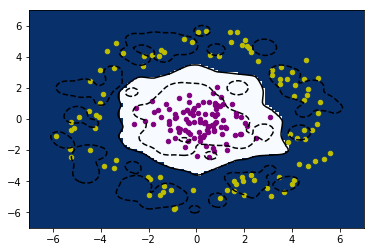

In [714]:
x = np.linspace(-7, 7, 100)
y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(x, y)

XY = np.array([X,Y])
Z = np.zeros_like(X)

n,m = X.shape
for i in range(n):
    for j in range(m):
        Z[i,j] = predict(XY[:,i,j], alpha_circles, circle_feature, circles_labels, var)

plt.figure()
plt.pcolormesh(X, Y, Z > 0, cmap=plt.cm.Blues )
plt.contour(X, Y, Z, colors =['k','k','k'], levels=[-0.5, 0, 0.5], linestyles=['--','-','--'] )
plt.scatter(circles_1[:,0],circles_1[:,1], color='purple',s=20)
plt.scatter(circles_2[:,0],circles_2[:,1], color='y', s=20)

In [734]:
count = 0
for i in range(200):
    if circles_labels[i]==y_svm[i]: count+=1
print("Precisión en la predicción correcta:",count/200)

M_confu = confusion_matrix(y_svm, circles_labels)
print("Matriz de confución usando: KSM sigma=0.1")
print(M_confu,"\nTotal de errores:", 200-np.trace(M_confu),"\n")
print("% de Gaussianas activas:", alpha_circles[alpha_circles>0].shape[0]/alpha_circles.shape[0])

Precisión en la predicción correcta: 1.0
Matriz de confución usando: KSM sigma=0.1
[[100   0]
 [  0 100]] 
Total de errores: 0 

% de Gaussianas activas: 0.815


In [735]:
# sigma^2 = 0.01
var = 0.01
y_svm, alpha_circles = Kernel_Support_Machine(circles_features, circles_labels, var)

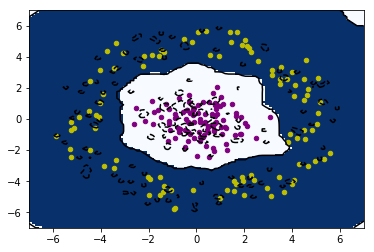

In [718]:
x = np.linspace(-7, 7, 100)
y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(x, y)

XY = np.array([X,Y])
Z = np.zeros_like(X)

n,m = X.shape
for i in range(n):
    for j in range(m):
        Z[i,j] = predict(XY[:,i,j], alpha_circles, circle_feature, circles_labels,var)

plt.figure()
plt.pcolormesh(X, Y, Z > 0, cmap=plt.cm.Blues )
plt.contour(X, Y, Z, colors =['k','k','k'], levels=[-0.5, 0, 0.5], linestyles=['--','-','--'] )
plt.scatter(circles_1[:,0],circles_1[:,1], color='purple',s=20)
plt.scatter(circles_2[:,0],circles_2[:,1], color='y', s=20)

In [736]:
count = 0
for i in range(200):
    if circles_labels[i]==y_svm[i]: count+=1
print("Precisión en la predicción correcta:",count/200)

M_confu = confusion_matrix(y_svm, circles_labels)
print("Matriz de confución usando: KSM sigma=0.01")
print(M_confu,"\nTotal de errores:", 200-np.trace(M_confu),"\n")
print("% de Gaussianas activas:", alpha_circles[alpha_circles>0].shape[0]/alpha_circles.shape[0])

Precisión en la predicción correcta: 1.0
Matriz de confución usando: KSM sigma=0.01
[[100   0]
 [  0 100]] 
Total de errores: 0 

% de Gaussianas activas: 0.985
